In [122]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2 as cv

Script di atas merupakan sintaks untuk pemanggilan library yang akan digunakan dalam program selanjutnya 

Script di bawah merupakan sintaks yang dimana img.imread() berguna untuk meng-import gambar yang akan digunakan dalam program  gambar dengan library matplotlib.pylot dan ('aang.jpg') merupakan sebuah link gambar yang di import dari device dan code imshow() berfungsi untuk menampikan gambar yang kita import.

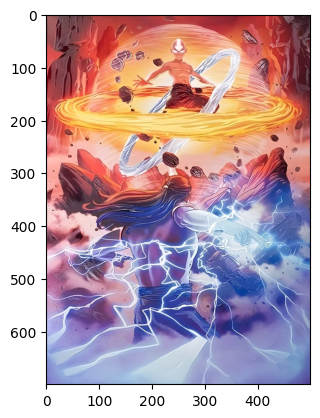

In [123]:
image = img.imread('aang.jpg')
plt.imshow(image)

Script di bawah digunakan untuk mengkonversi gambar dari warna/clorfull menjadi warna abu/gray yang dimana pada sintaks ini menggunakan library openCV

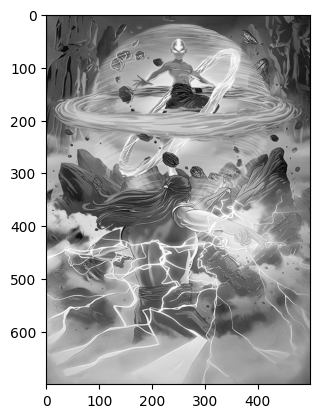

In [124]:
grayImage = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(grayImage, cmap='gray')

In [125]:
x, y = grayImage.shape

Script di atas digunakan mendapatkan ukuran citra (tinggi dan lebar) dengan bantuan method shape(), ukuran kemudian di simpan ke dalam variabel x dan y. lalu memunculkan hasil tinggi dan lebar sebuah foto.

In [126]:
sumGray = np.zeros(256).astype(int)

script di atas digunakan inisialisasi sumGray yang mana berisi array yang memiliki nilai 0 sebanyak 256 array dengan tipe datanya yaitu int. Selanjutnya menghitung jumlah masing masing intensitas piksel pada citra dengan meng-nolkan terlebih dahulu dengan menggunakan sintaks "np.zeros".

In [127]:
for i in range(x):
    for j in range(y):
        val = grayImage[i,j]
        sumGray[val] +=1 
        
print(sumGray)

[   0    0    0   11   22   29   59   76   59   73   68   73   92   77
  110  103  159  127  130  162  171  163  157  147  146  150  143  168
  191  249  348  362  401  412  360  375  389  400  396  406  484  430
  482  473  538  502  589  584  614  592  620  635  636  662  680  819
  772  900  916  943 1066 1100 1142 1183 1273 1282 1207 1189 1140 1242
 1491 1756 1787 1930 1881 1894 2034 2083 2180 2174 2128 2059 1966 1942
 1893 1810 1774 1773 1848 1891 1830 1764 1744 1743 1749 1717 1833 1938
 1744 1732 1788 1829 1869 1859 1664 1715 1787 1727 1754 1767 1881 1813
 1900 1811 1843 1811 1810 1784 1757 1845 1758 1681 1712 1752 1724 1717
 1734 1723 1647 1630 1781 1646 1679 1757 1793 1724 1791 1876 1971 1948
 2109 2034 2081 2079 2157 2129 2182 2059 2143 2203 2221 2204 2269 2445
 2404 2359 2277 2557 2670 2690 2636 2607 2768 2709 2767 2953 2752 2708
 2622 2671 2592 2497 2534 2478 2643 2654 2540 2556 2467 2394 2529 2463
 2606 2672 2411 2481 2564 2436 2509 2483 2168 2146 2167 2026 1807 1705
 1653 

script di atas digunakan untuk menambah kondisi perulangan dengan batas iterasi yaitu variabel tinggi dan lebar yang tadi sudah dideklarasikan dengan membuat array untuk menyimpan jumlah setiap intensitas citra. print(sumGray) digunakan untuk memanggil fungsi penjumlahan untuk menjumlahkan seluruh dari list sumGray sekaligus untuk menampilkannya

Script di bawah digunakan untuk melakukan iterasi dari 0 sampai -1 dari 256 untuk menghasilkan nilai dari 0-255 yaitu rentang gray level dari soal yang diberikan.dan script bawah pula berfungsi untuk memanggil fungsi bar dari plt untuk membuat sebuah histogram yang berisikan nilai dari grayImagevalue dan sumGray serta menampilkannya

Text(0, 0.5, 'Jumlah Piksel')

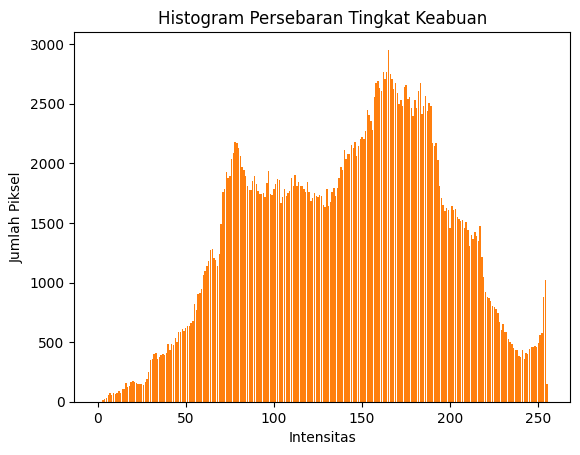

In [128]:
grayImageValue = [i for i in range (0,256)]
plt.bar(grayImageValue, sumGray/(x*y))
plt.bar(grayImageValue, sumGray)
plt.title('Histogram Persebaran Tingkat Keabuan')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Piksel')

In [129]:
kernel = np.array([
    [1, 2, -1, 1],
    [0, 2, 1, 2],
    [2, 1, 1 ,0],
    [1, 0, -1, 0]
])

Script di atas digunakan untuk inisialisasi variabel kernel yang akan dipakai untuk melakukan  proses konvolusi pada citra yang ada

In [130]:
def normalize_intensity(image):
    min_val = np.min(image)
    max_val = np.max(image)
    normalized_image = ((image - min_val) / (max_val - min_val)) * 255
    normalized_image = np.round(normalized_image).astype(np.uint8)
    return normalized_image

Script di atas merupakan fungsi normalize_intensity yang digunakan untuk menormalisasikan intensitas piksel dalam gambar dengan mencari nilai minum dan maksimum dalam gambar yang ada. 

In [131]:
def convolution(img, kernel):
    img_height, img_width = img.shape
    kernel_height, kernel_width = kernel.shape

    padding_height = kernel_height // 2
    padding_width = kernel_width // 2

    padded_img = np.pad(img, ((padding_height, padding_height), (padding_width, padding_width)), mode='constant', constant_values=0)
    
    result = np.zeros((img_height, img_width))
    for i in range(img_height):
        for j in range(img_width):
            result[i][j] = padded_img[i][j]*kernel[0][0] + padded_img[i][j+1]*kernel[0][1] + padded_img[i][j+2]*kernel[0][2] + padded_img[i][j+3]*kernel[0][3] + padded_img[i+1][j]*kernel[1][0] + padded_img[i+1][j+1]*kernel[1][1]+padded_img[i+1][j+2]*kernel[1][2]+padded_img[i+1][j+3] * kernel[1][3]+padded_img[i+2][j]*kernel[2][0]+padded_img[i+2][j+1]*kernel[2][1]+padded_img[i+2][j+2]*kernel[2, 2]+padded_img[i+2][j+3] * kernel[2][3] + padded_img[i+3][j]*kernel[3][0]+padded_img[i+3][j+1] * kernel[3][1]+padded_img[i+3][j+2]*kernel[3, 2] + padded_img[i+3][j+3]*kernel[3][3]
    return result

Scipt di atas merupakan fungsi convolution yang digunakan untuk mengimplementasikan operasi konvolusi pada citra gambar yang ada berdasarkan kernel yang ada pada program sebelumnya.

In [132]:
def clip_image(image, clip_min=0, clip_max=127):
    result_img = np.zeros(image.shape).astype(int)
    for rowIdx, row in enumerate(image):
        for index, px in enumerate(row):
            if(px < clip_min):
                result_img[rowIdx][index] = clip_min
            elif(px > clip_max):
                result_img[rowIdx][index] = clip_max
    return result_img

Script di atas merupakan fungsi clip_image yang digunakan untuk mengimplementasikan proses klipping terhadap nilai piksel dalam gambar pada rentang tertentu

Script di bawah digunakan untuk menampilkan hasil konvolusi ke layar menggunakan syntax imshow dari library matplotlib 

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0 127 ...   0   0   0]
 [  0   0 127 ...   0   0   0]
 [  0   0 127 ...   0   0   0]]


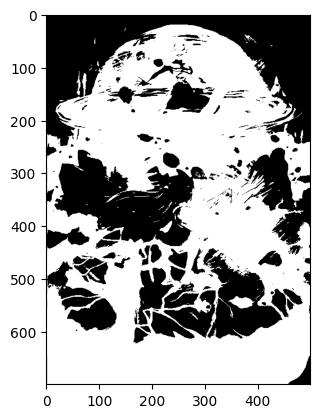

In [133]:

result = convolution(grayImage, kernel)
normalize = normalize_intensity(result)
treshold = clip_image(normalize)
print(treshold)
plt.imshow(treshold, cmap="gray")

Script di bawah digunakan untuk mengimplementasikan operasi rotasi pada gambar sekaligus menampilkan hasil dari operasi rotasi yang telah dilakukan

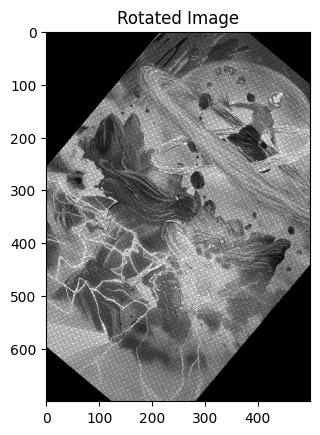

In [134]:
angle = 40 * np.pi / 180
height, width = normalize.shape
center = (width // 2, height // 2)

rotatedImage = np.zeros((height, width))

for x in range(width):
    for y in range(height):
        new_x = int((x - center[0]) * np.cos(angle) - (y - center[1]) * np.sin(angle) + center[0])
        new_y = int((x - center[0]) * np.sin(angle) + (y - center[1]) * np.cos(angle) + center[1])
        
        if 0 <= new_x < width and 0 <= new_y < height:
            rotatedImage[new_y, new_x] = grayImage[y, x]

# Tampilkan citra yang diputar
plt.imshow(rotatedImage, cmap='gray')
plt.title('Rotated Image')
plt.show()

Script di dibawah digunakan untuk mengimplementasikan operasi translasi yang telah diputar pada program sebelumnya sekaligus menampilkan hasil dari operasi translasi yang telah dilakukan

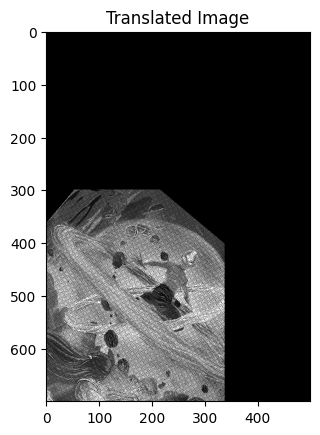

In [135]:
tX = -163
tY = 300

height, width = grayImage.shape

translatedImage = np.zeros((height, width))

for x in range(width):
    for y in range(height):
        new_x = x + tX
        new_y = y + tY
        
        if 0 <= new_x < width and 0 <= new_y < height:
            translatedImage[new_y, new_x] = rotated_image[y, x]

plt.imshow(translatedImage, cmap="gray")
plt.title('Translated Image')
plt.show()


Script di dibawah digunakan untuk mengimplementasikan operasi pencerminan/mirored  sekaligus menampilkan hasil dari operasi pencerminan/mirroed yang telah dilakukan

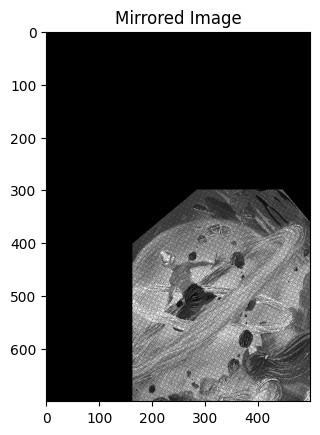

In [136]:
height, width = translated_image.shape

miroredImage = np.zeros((height, width))

for x in range(width):
    for y in range(height):
        new_x = width - 1 - x 
        new_y = y
        
        miroredImage[new_y, new_x] = translated_image[y, x]

plt.imshow(miroredImage, cmap="gray")
plt.title('Mirrored Image')
plt.show()

Script di dibawah digunakan untuk mengimplementasikan operasi dilatasi  sekaligus menampilkan hasil dari operasi dilatasi yang telah dilakukan

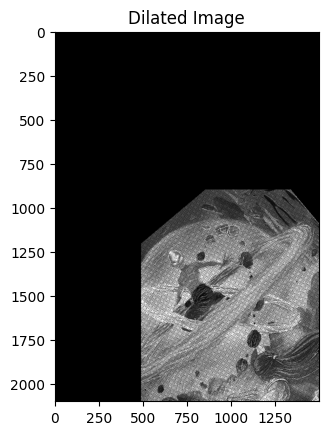

In [137]:
height, width = mirrored_image.shape

new_height = height * 3
new_width = width * 3

dilated_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)

for x in range(width):
    for y in range(height):
        new_x = x * 3
        new_y = y * 3
        
        dilated_image[new_y:new_y+3, new_x:new_x+3] = mirrored_image[y, x]

plt.imshow(dilated_image, cmap="gray")
plt.title('Dilated Image')
plt.show()
